In [1]:
import numpy as np
import matplotlib.pyplot as plt

def stokes_law(radius, beta, nu):
    g = 9.81
    v_s = 2 * (beta - 1) * g * radius ** 2 / (9 * nu)

    return v_s

def drag_coefficient(Re):
    C_d = 24/Re + 5/np.sqrt(Re) + 2/5
    return C_d

def Reynolds_number(radius, w, nu):
    Re = w * 2* radius / nu
    return Re

def terminal_velocity(radius, beta, Cd):
    g = 9.81
    v_s = np.sqrt(2 * radius * g * (beta - 1)/Cd)

    return v_s

def regime_change(radius, Re=1):
    ν = 1e-6
    U = ν * Re / (2 * radius)
    
    return U


In [2]:
def reynolds_regimes(radius, Re=1):
    nu = 1e-6
    U = nu * Re / (2*radius)

    return U

def stokes_regime(radiuss, beta, Stk=1):
    nu = 1e-6
    tau = beta*2*radiuss**2/(18*nu)
    
    U = Stk * 2*radiuss/tau

    return U


def stokes_time(radiuss, beta, Stk=1):
    nu = 1e-6
    tau = beta*2*radiuss**2/(18*nu)

    return tau

def limit_radius(Re, nu, beta):
    
    R = ((9*Re*nu**2)/(4*(beta-1)*9.8))**(1/3)
    
    return R

In [3]:
buoyancy_ratios = [1.38/1.05,1.38/1.025]

In [4]:
R_limit = limit_radius(1, 1e-6, buoyancy_ratios[1])
print(R_limit)
R_limit = 1e-4

8.71934747151849e-05


In [5]:
radiuses = np.logspace(-9, -2, 1000)
radiuses_largeRe = np.logspace(-6, -2, 1000)

alpha_patch = np.logspace(-6, -4, 100)
alpha_patch2 = np.logspace(-4, -2, 100)


In [6]:
nu = 1.5e-6

# terminal velocities for Re<<1 
sts_b1 = stokes_law(radiuses, buoyancy_ratios[0], nu)
sts_b2 = stokes_law(radiuses, buoyancy_ratios[1], nu)

vs_re1_b0_patch2 = stokes_law(alpha_patch2, buoyancy_ratios[0], nu) # patch for alpha for curve in Re<1
vs_re1_b1_patch2 = stokes_law(alpha_patch2, buoyancy_ratios[1], nu) # same as above

# terminal velocities for Re>1
Re_1 = reynolds_regimes(radiuses, Re=1)
Re_1000 = reynolds_regimes(radiuses, Re=10000000) 

In [7]:
# terminal velocities for Re>1
cd_re1 = drag_coefficient(1)
vs_re1_b0 = terminal_velocity(radiuses_largeRe, buoyancy_ratios[0], cd_re1)

vs_re1_b1 = terminal_velocity(radiuses_largeRe, buoyancy_ratios[1], cd_re1)

vs_re1_b1_patch = terminal_velocity(alpha_patch, buoyancy_ratios[1], cd_re1) # patch for alpha for curve in Re<1 
vs_re1_b0_patch = terminal_velocity(alpha_patch, buoyancy_ratios[0], cd_re1) # same as above 



# terminal velocities for Re=3000
cd_re3000 = drag_coefficient(1000)

vs_re3000_b0 = terminal_velocity(radiuses_largeRe, buoyancy_ratios[0], cd_re3000) # not in use
vs_re3000_b1 = terminal_velocity(radiuses_largeRe, buoyancy_ratios[1], cd_re3000) # not in use

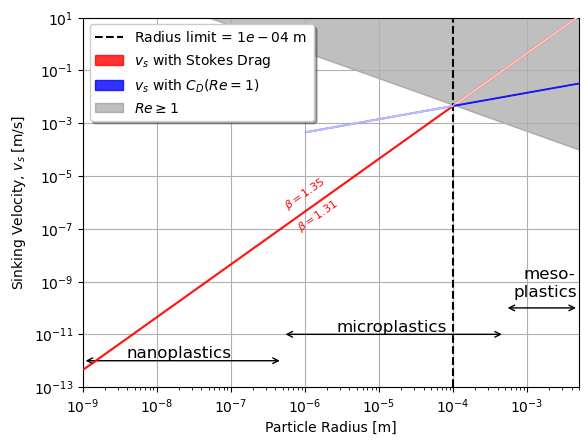

In [10]:
plt.fill_between(radiuses, sts_b1, sts_b2, color='red', alpha=0.8, label=r'$v_s$ with Stokes Drag',
                 zorder=10)
plt.fill_between(alpha_patch2, vs_re1_b0_patch2, vs_re1_b1_patch2, color='white', alpha=0.6, zorder=10)

plt.fill_between(radiuses_largeRe, vs_re1_b0, vs_re1_b1, color='blue', alpha=0.8, label=r'$v_s$ with $C_D(Re=1)$',
                 zorder=10)

plt.fill_between(alpha_patch, vs_re1_b0_patch, vs_re1_b1_patch, color='white', alpha=0.6, zorder=10)

# plt.fill_between(radiuses_largeRe, vs_re3000_b0, vs_re3000_b1, color='green', alpha=0.5, label=r'$v_s$ for $Re=3000$')


# plt.fill_between(radiuses, vs_b1, vs_b2, color='blue', alpha=0.5, label=r'$v_s$ with Drag Coefficient')

# plt.plot(radiuses, Re_1, color='black', label=r'$Re = 1$')
plt.fill_between(radiuses, Re_1, Re_1000, color='gray', alpha=0.5, label=r'$Re \geq 1$')

plt.axvline(R_limit, color='black', linestyle='--', label=r'Radius limit = ${:.0e}$ m '.format(R_limit))

plt.semilogy()
plt.semilogx()
plt.xlabel('Particle Radius [m]')
plt.ylabel('Sinking Velocity, $v_s$ [m/s]')
plt.legend(loc='upper left', shadow=True)
plt.grid()

# microplastics scales 
plt.annotate("", xy=(1e-9, 1e-12), xytext=(1e-6/2, 1e-12), arrowprops=dict(arrowstyle="<->", color='black'))
plt.text(4e-8/2, 1e-12, 'nanoplastics', fontsize=12, ha='center', va='bottom')

plt.annotate("", xy=(1e-6/2, 1e-11), xytext=(1e-3/2, 1e-11), arrowprops=dict(arrowstyle="<->", color='black'))
plt.text(3e-5/2, 1e-11, 'microplastics', fontsize=12, ha='center', va='bottom')

plt.annotate("", xy=(1e-3/2, 1e-10), xytext=(1e-2/2, 1e-10), arrowprops=dict(arrowstyle="<->", color='black'))
plt.text(4e-3/2, 1e-9, 'meso-', fontsize=12, ha='center', va='bottom')
plt.text(3.5e-3/2, 2e-10, 'plastics', fontsize=12, ha='center', va='bottom')

# format string with number with 2decimal places 
# string = '{:.2f}'.format(buoyancy_ratios[0])

plt.text(3e-6/2, 6e-8, r'$\beta = {:.2f}$'.format(buoyancy_ratios[0]), fontsize=8, ha='center', va='bottom', color='red', rotation=35)
plt.text(2e-6/2, 4e-7, r'$\beta = {:.2f}$'.format(buoyancy_ratios[1]), fontsize=8, ha='center', va='bottom', color='red',rotation=35)


plt.ylim(1e-13, 1.e1)
plt.xlim(1e-9, 1e-2/2)

plt.savefig('../article_figs/terminal_velocity.png', dpi=300, bbox_inches='tight')

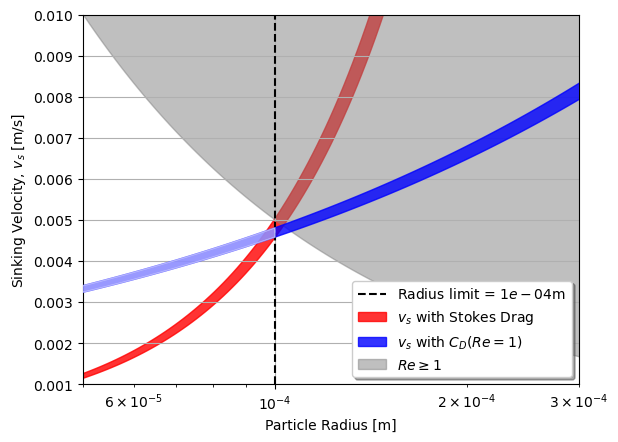

In [9]:
# plt.fill_between(radiuses, sts_b1, sts_b2, color='red', alpha=0.8, label=r'$v_s$ for $\beta=[{:.2f}, {:.2f}]$'.format(buoyancy_ratios[0], buoyancy_ratios[1]))
plt.fill_between(radiuses, sts_b1, sts_b2, color='red', alpha=0.8, label=r'$v_s$ with Stokes Drag')


plt.fill_between(radiuses_largeRe, vs_re1_b0, vs_re1_b1, color='blue', alpha=0.8, label=r'$v_s$ with $C_D(Re=1)$', zorder=10)
plt.fill_between(alpha_patch, vs_re1_b0_patch, vs_re1_b1_patch, color='white', alpha=0.5, zorder=10)

# plt.fill_between(radiuses_largeRe, vs_re3000_b0, vs_re3000_b1, color='green', alpha=0.5, label=r'$v_s$ for $Re=3000$')


plt.fill_between(radiuses, Re_1, Re_1000, color='gray', alpha=0.5, label=r'$Re \geq 1$')

plt.axvline(R_limit, color='black', linestyle='--', label=r'Radius limit = ${:.0e}$m '.format(R_limit))


# plt.semilogy()
plt.semilogx()
plt.xlabel('Particle Radius [m]')
plt.ylabel('Sinking Velocity, $v_s$ [m/s]')
plt.legend(loc='lower right', shadow=True)
plt.grid()


plt.ylim(1e-3, 1.e-2)
plt.xlim(1e-4/2, 6e-4/2)

# plt.savefig('../figs/terminal_velocity_zoom.png', dpi=300, bbox_inches='tight')

# Brownian motion vs. sinking velocity

Using the Stokes Einstein Equation: 

$$D_h = \frac{k_B T}{6 \pi \eta R}$$

and setting $T = 4\degree C$, $\eta 0.001$ 

In [15]:
eta = nu/1050

In [16]:
eta

1.4285714285714286e-09

In [59]:

def stokes_einstein(T, R):
    Kb = 1.38e-23
    T += 273.15
    eta = nu*1050
    
    D = Kb*T/(6*np.pi*eta*R)
    
    return D


In [60]:
D_h = stokes_einstein(4, radiuses)

dt = 60**2
L_browninan = np.sqrt(2*D_h*dt)
v_browninan = L_browninan/dt


In [61]:
L_vs = sts_b1*60**2

Text(0.5, 0, 'Particle Radius (m)')

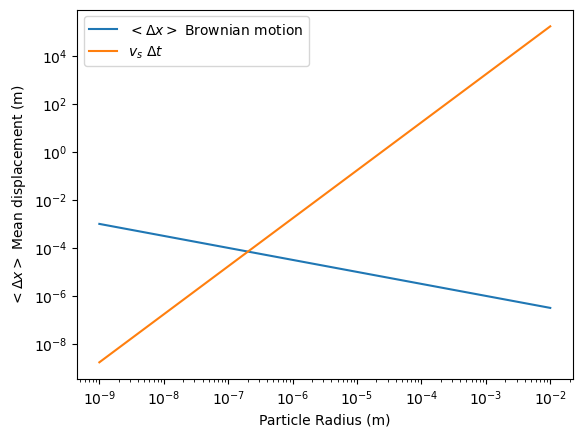

In [62]:
plt.plot(radiuses, L_browninan, label='$<\Delta x >$ Brownian motion')
plt.plot(radiuses, L_vs, label='$v_s \ \Delta t$')
plt.loglog()
plt.legend()
plt.ylabel('$<\Delta x >$ Mean displacement (m)')
plt.xlabel('Particle Radius (m)')

Text(0.5, 0, 'Particle Radius (m)')

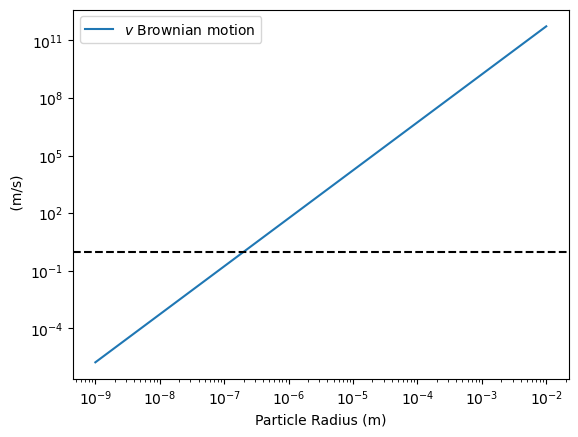

In [63]:
plt.plot(radiuses, L_vs/L_browninan, label='$v$ Brownian motion')
plt.axhline(1, color='k', ls='--')
plt.loglog()
plt.legend()
plt.ylabel(' (m/s)')
plt.xlabel('Particle Radius (m)')